#### 1. Business Understanding
- Forecasting transactions
- Likely regression
- Data for 3 years
- Advised data quality is okay

In [6]:
%config Completer.use_jedi = False

#### 2. Data Understanding

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('regression.csv')

In [5]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [7]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [9]:
df.columns

Index(['Year', 'Month', 'Cost Centre', 'Account', 'Account Description',
       'Account Type', 'Amount'],
      dtype='object')

In [10]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [11]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [12]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

#### 2.1. Visualize Data

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

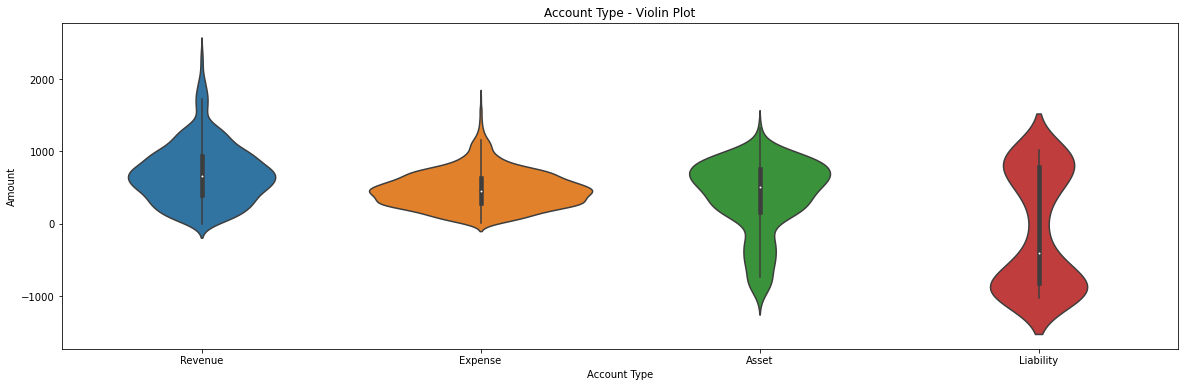

In [15]:
plt.figure(figsize=(20,6))
sns.violinplot(x="Account Type", y="Amount", data=df).set_title('Account Type - Violin Plot')
plt.show()

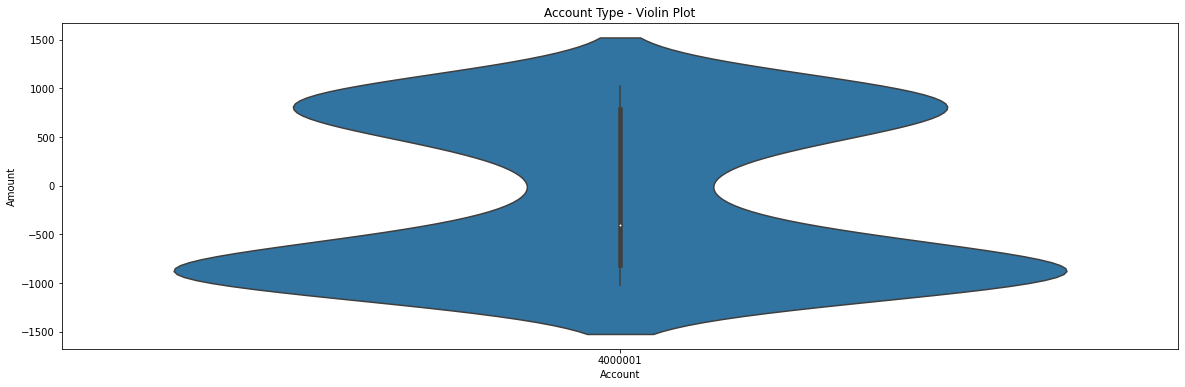

In [17]:
plt.figure(figsize=(20,6))
sns.violinplot(x="Account Type", y="Amount", data=df[df['Account Type']== 'Lia']).set_title('Account Type - Violin Plot')
plt.show()

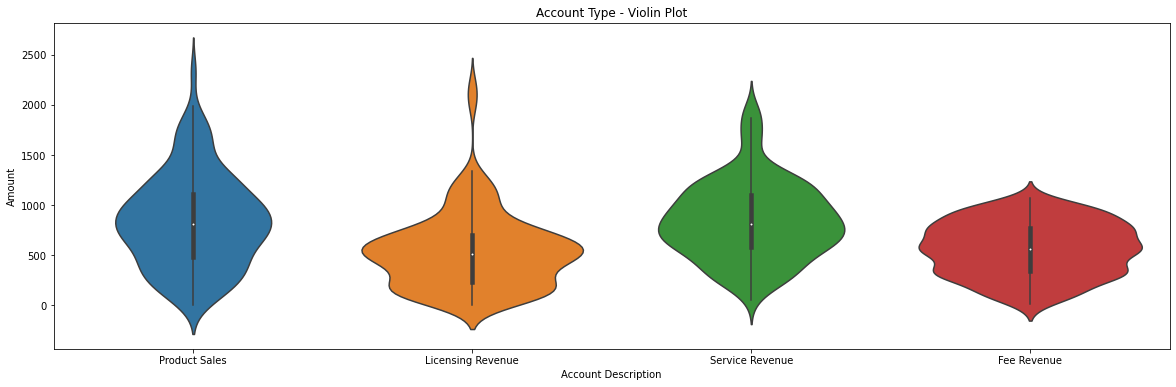

In [20]:
plt.figure(figsize=(20,6))
sns.violinplot(x="Account Description", y="Amount", data=df[df['Account Type']== 'Revenue']).set_title('Account Type - Violin Plot')
plt.show()

#### 2.2. Review Trends

In [21]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [22]:
monthmap = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12
}

In [23]:
monthmap['Jan']

1

In [27]:
df['Period'] = df['Month'].apply(lambda x: monthmap[x])

In [28]:
df['Day'] = 1

In [29]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1


In [30]:
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['Day'].astype(str)

In [31]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-1-1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-1-1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-1-1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-1-1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-1-1


In [32]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
Period                   int64
Day                      int64
Date                    object
dtype: object

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

<AxesSubplot:xlabel='Date', ylabel='Amount'>

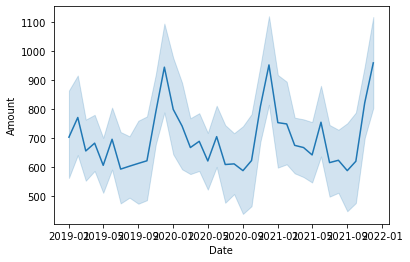

In [37]:
sns.lineplot(x='Date', y='Amount', data=df[df['Account Type']== 'Revenue'])

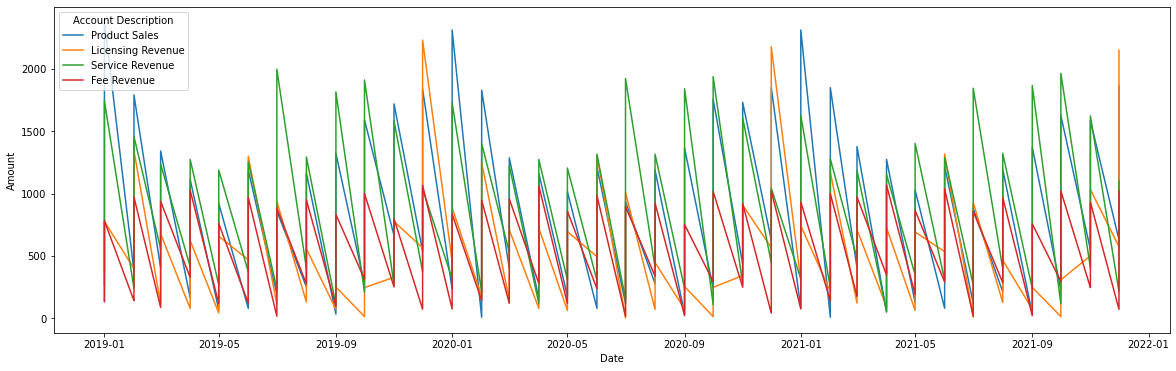

In [38]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue= 'Account Description', estimator=None, data=df[df['Account Type']== 'Revenue'])
plt.show()

#### 3. Data Preparation

#### 4. Modelling

#### 5. Evaluation

#### 6. Deployment